In [2]:
import keras
import numpy as np
from keras.utils import np_utils
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import pandas as pd

Using TensorFlow backend.


In [3]:
def pre_process_data(num_train=50000, num_test=10000):
    """ Loads the dataset with the desired 
        number of training and testing data.

        Parameters
        ----------
        num_train : the number of training data
        
        num_test : the number of testing data
    """

    (X_train, y_train), (X_test, y_test) = cifar10.load_data()

    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    
    y_train = np.asarray([array[0] for array in y_train]).astype('float32')
    y_test = np.asarray([array[0] for array in y_test]).astype('float32')
    
    X_train, y_train = X_train[:num_train], y_train[:num_train]
    X_test, y_test = X_test[:num_test], y_test[:num_test]
    
    X_train = np.reshape(X_train, (X_train.shape[0], -1))
    X_test = np.reshape(X_test, (X_test.shape[0], -1))
    
    return X_train, y_train, X_test, y_test

In [4]:
# Dimensions of training and testing data
print("Training data shape: ", X_train.shape)
print("Training labels shape: ", y_train.shape)
print("Testing data shape: ", X_test.shape)
print("Testing labels shape: ", y_test.shape)
print('\n')
print('data type: {}'.format(X_train.dtype))
print('label type: {}'.format(y_train.dtype))

Training data shape:  (50000, 3072)
Training labels shape:  (50000,)
Testing data shape:  (10000, 3072)
Testing labels shape:  (10000,)


data type: float32
label type: float32


In [5]:
def train(X_train, y_train):
    """ Trains the model on the training data.
    """
    # Here training means memorization of data which has already been done.
    return

In [6]:
def compute_distances(x, y):
    """ Computes the L2 distance between each row 
        in `x` and `y`.

        Parameters
        ----------
        x : numpy.ndarray
            x.shape must be (M, D)
            Each row of `x` is a flattened vector representing the pixel 
            values of a single image. Thus `x` represents
            M images, each one described by a length-D vector.

        y : numpy.ndarray
            y.shape must be (N, D)
            Each row of `y` is a flattened vector representing the pixel 
            values of a single image. Thus `y` represents
            N images, each one described by a length-D vector.

        Returns
        -------
        distances : numpy.ndarray
            distances.shape = (M, N)
            distances[i, j] = the L2 distance between x[i] and y[j]
    """
    xSumSquare = np.sum(np.square(x),axis=1);
    ySumSquare = np.sum(np.square(y),axis=1);
    mul = np.dot(x,y.T);
    dists = np.sqrt(xSumSquare[:,np.newaxis]+ySumSquare-2*mul)
    return dists

In [7]:
def predict(dists, labels, k):
    """ Given a shape-(M, N) array of distances between M-unlabeled 
        and N-labeled images, and N labels, predicts a label for each 
        of the M images based on its k-nearest neighbors.

        Parameters
        ----------
        dists : numpy.ndarray
            `dists.shape` must be (M, N) where M is the number of
            examples you wish to predict labels for, and N is 
            the number of labeled images used in the prediction
        
        labels : numpy.ndarray
            A shape-(N,) array of class-IDs, of labels for the N images.    

        Returns
        -------
        y_pred : numpy.array`
            A shape-(M,) array of class-IDs, as predicted by the k-nearest
            neighbors.
    """
    mins = np.argsort(dists, axis= 1)[:,:k]
    labs = np.array([labels[mins[i,j]] for i in range(np.shape(mins)[0]) for j in range(np.shape(mins)[1])]).reshape(np.shape(mins)[0],np.shape(mins)[1])

    x = np.array([])
    for i in range(np.shape(labs)[0]):
        if len(set(labs[i])) == 1:
            x = np.append(x, labs[i][0])
        elif len(set(labs[i])) == len(labs[i]):
            x = np.append(x, min(set(labs[i])))
        elif len(set(labs[i])) < len((labs[i])):
            arr = np.array((np.unique(labs[i], return_counts=True))).T.tolist()
            arr = sorted(arr, key=lambda x: x[1], reverse = True)
            x = np.append(x, arr[0][0])
    x = x.astype(int)
    
    return x

In [8]:
def k_nearest_neighbor(X_train, y_train, X_test, k):

    train(X_train, y_train)

    dists = compute_distances(X_test, X_train)
    predictions = predict(dists, y_train,k)
    
    return predictions

In [9]:
# With training data = 50,000

from sklearn.metrics import accuracy_score

X_train, y_train, X_test, y_test = pre_process_data()
accuracy_list = []
k_list = [i for i in range(1,50)]

for i in k_list:

    predictions = k_nearest_neighbor(X_train, y_train, X_test, i)

    accuracy = accuracy_score(y_test, predictions) * 100
    print("Accuracy: {}".format(accuracy) , "with k = " , str(i))
    accuracy_list.append(accuracy)
#     print(accuracy_list)

Accuracy: 35.39 with k =  1
[35.39]
Accuracy: 31.15 with k =  2
[35.39, 31.15]
Accuracy: 33.019999999999996 with k =  3
[35.39, 31.15, 33.019999999999996]
Accuracy: 33.98 with k =  4
[35.39, 31.15, 33.019999999999996, 33.98]
Accuracy: 33.98 with k =  5
[35.39, 31.15, 33.019999999999996, 33.98, 33.98]
Accuracy: 34.0 with k =  6
[35.39, 31.15, 33.019999999999996, 33.98, 33.98, 34.0]
Accuracy: 33.58 with k =  7
[35.39, 31.15, 33.019999999999996, 33.98, 33.98, 34.0, 33.58]
Accuracy: 34.150000000000006 with k =  8
[35.39, 31.15, 33.019999999999996, 33.98, 33.98, 34.0, 33.58, 34.150000000000006]
Accuracy: 33.98 with k =  9
[35.39, 31.15, 33.019999999999996, 33.98, 33.98, 34.0, 33.58, 34.150000000000006, 33.98]
Accuracy: 33.86 with k =  10
[35.39, 31.15, 33.019999999999996, 33.98, 33.98, 34.0, 33.58, 34.150000000000006, 33.98, 33.86]
Accuracy: 34.150000000000006 with k =  11
[35.39, 31.15, 33.019999999999996, 33.98, 33.98, 34.0, 33.58, 34.150000000000006, 33.98, 33.86, 34.150000000000006]
Acc

Accuracy: 33.18 with k =  38
[35.39, 31.15, 33.019999999999996, 33.98, 33.98, 34.0, 33.58, 34.150000000000006, 33.98, 33.86, 34.150000000000006, 34.28, 34.17, 34.07, 34.050000000000004, 34.02, 34.1, 33.900000000000006, 33.97, 33.75, 33.52, 33.51, 33.489999999999995, 33.47, 33.47, 33.489999999999995, 33.489999999999995, 33.6, 33.43, 33.46, 33.46, 33.36, 33.51, 33.15, 33.050000000000004, 33.129999999999995, 33.19, 33.18]
Accuracy: 33.1 with k =  39
[35.39, 31.15, 33.019999999999996, 33.98, 33.98, 34.0, 33.58, 34.150000000000006, 33.98, 33.86, 34.150000000000006, 34.28, 34.17, 34.07, 34.050000000000004, 34.02, 34.1, 33.900000000000006, 33.97, 33.75, 33.52, 33.51, 33.489999999999995, 33.47, 33.47, 33.489999999999995, 33.489999999999995, 33.6, 33.43, 33.46, 33.46, 33.36, 33.51, 33.15, 33.050000000000004, 33.129999999999995, 33.19, 33.18, 33.1]
Accuracy: 33.0 with k =  40
[35.39, 31.15, 33.019999999999996, 33.98, 33.98, 34.0, 33.58, 34.150000000000006, 33.98, 33.86, 34.150000000000006, 34.28

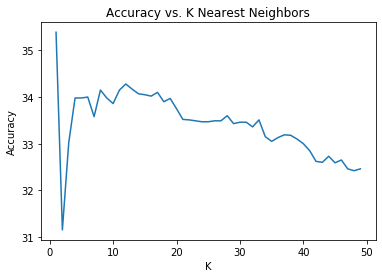

<Figure size 432x288 with 0 Axes>

In [54]:
# With all the data
plt.plot(k_list, a_full)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. K Nearest Neighbors')
plt.show()
plt.savefig('Acc_vs_K.png')

In [43]:
a_full = [35.39, 31.15, 33.02, 33.98, 33.98, 34.00, 33.58, 34.15,
 33.98, 33.86, 34.15, 34.28, 34.17, 34.07, 34.05, 34.02,
 34.10, 33.90, 33.97, 33.75, 33.52, 33.51, 33.49, 33.47,
 33.47, 33.49, 33.49, 33.60, 33.43, 33.46, 33.46, 33.36,
 33.51, 33.15, 33.05, 33.13, 33.19, 33.18, 33.10, 33.00,
 32.85, 32.62, 32.60, 32.73, 32.59, 32.65, 32.46, 32.42, 32.46]

In [44]:
d = {'K': [k_list[0],k_list[2],k_list[4],k_list[6],k_list[8]],
     'Accuracy': [a_full[0],a_full[2],a_full[4],a_full[6],a_full[8]]}
df = pd.DataFrame(data=d)
df

,K,Accuracy
0,1,35.39
1,3,33.02
2,5,33.98
3,7,33.58
4,9,33.98


In [55]:
# With training data = 25,000

from sklearn.metrics import accuracy_score

X_train, y_train, X_test, y_test = pre_process_data(num_train=25000, num_test=10000)
accuracy_list = []
k_list = [i for i in range(1,10,2)]

for i in k_list:
    
    # making predictions
    predictions = k_nearest_neighbor(X_train, y_train, X_test, i)

    # evaluating accuracy
    accuracy = accuracy_score(y_test, predictions) * 100
    print("Accuracy: {}".format(accuracy) , "with k = " , str(i))
    accuracy_list.append(accuracy)
#     print(accuracy_list)

Accuracy: 31.97 with k =  1
[31.97]
Accuracy: 31.209999999999997 with k =  3
[31.97, 31.209999999999997]
Accuracy: 32.43 with k =  5
[31.97, 31.209999999999997, 32.43]
Accuracy: 32.01 with k =  7
[31.97, 31.209999999999997, 32.43, 32.01]
Accuracy: 32.42 with k =  9
[31.97, 31.209999999999997, 32.43, 32.01, 32.42]


In [60]:
d2 = {'K': k_list, 'Accuracy': accuracy_list}
df2 = pd.DataFrame(data=d2)

df2

,K,Accuracy
0,1,31.97
1,3,31.21
2,5,32.43
3,7,32.01
4,9,32.42


In [9]:
# With training data = 50,000

from sklearn.metrics import accuracy_score

X_train, y_train, X_test, y_test = pre_process_data(num_train=50000, num_test=10000)
accuracy_list = []
k_list = [i for i in range(1,10,2)]

for i in k_list:
    
    # making predictions
    predictions = k_nearest_neighbor(X_train, y_train, X_test, i)

    # evaluating accuracy
    accuracy = accuracy_score(y_test, predictions) * 100
    print("Accuracy: {}".format(accuracy) , "with k = " , str(i))
    accuracy_list.append(accuracy)
    print(accuracy_list)

Accuracy: 35.39 with k =  1
[35.39]
Accuracy: 33.019999999999996 with k =  3
[35.39, 33.019999999999996]
Accuracy: 33.98 with k =  5
[35.39, 33.019999999999996, 33.98]
Accuracy: 33.58 with k =  7
[35.39, 33.019999999999996, 33.98, 33.58]
Accuracy: 33.98 with k =  9
[35.39, 33.019999999999996, 33.98, 33.58, 33.98]
